In [2]:
import scipy.io as sio
import matplotlib.pyplot as plt
import numpy as np
# from cnn import get_mini_batch, fc, relu, conv, pool2x2, flattening
# from cnn import train_slp_linear, train_slp, train_mlp, train_cnn


def main_slp_linear():
    mnist_train = sio.loadmat('./mnist_train.mat')
    mnist_test = sio.loadmat('./mnist_test.mat')
    im_train, label_train = mnist_train['im_train'], mnist_train['label_train']
    im_test, label_test = mnist_test['im_test'], mnist_test['label_test']
    batch_size = 32
    im_train, im_test = im_train / 255.0, im_test / 255.0
    mini_batch_x, mini_batch_y = get_mini_batch(im_train, label_train, batch_size)
    w, b = train_slp_linear(mini_batch_x, mini_batch_y)
    sio.savemat('slp_linear.mat', mdict={'w': w, 'b': b})

    acc = 0
    confusion = np.zeros((10, 10))
    num_test = im_test.shape[1]
    for i in range(num_test):
        x = im_test[:, [i]]
        y = fc(x, w, b)
        l_pred = np.argmax(y)
        confusion[l_pred, label_test[0, i]] = confusion[l_pred, label_test[0, i]] + 1

        if l_pred == label_test[0, i]:
            acc = acc + 1
    accuracy = acc / num_test
    for i in range(10):
        confusion[:, i] = confusion[:, i] / np.sum(confusion[:, i])

    label_classes = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
    visualize_confusion_matrix(confusion, accuracy, label_classes, 'Single-layer Linear Perceptron Confusion Matrix')

def main_slp():
    mnist_train = sio.loadmat('./mnist_train.mat')
    mnist_test = sio.loadmat('./mnist_test.mat')
    im_train, label_train = mnist_train['im_train'], mnist_train['label_train']
    im_test, label_test = mnist_test['im_test'], mnist_test['label_test']
    batch_size = 32
    im_train, im_test = im_train / 255.0, im_test / 255.0
    mini_batch_x, mini_batch_y = get_mini_batch(im_train, label_train, batch_size)
    w, b = train_slp(mini_batch_x, mini_batch_y)
    sio.savemat('slp.mat', mdict={'w': w, 'b': b})

    acc = 0
    confusion = np.zeros((10, 10))
    num_test = im_test.shape[1]
    for i in range(num_test):
        x = im_test[:, [i]]
        y = fc(x, w, b)
        l_pred = np.argmax(y)
        confusion[l_pred, label_test[0, i]] = confusion[l_pred, label_test[0, i]] + 1

        if l_pred == label_test[0, i]:
            acc = acc + 1
    accuracy = acc / num_test
    for i in range(10):
        confusion[:, i] = confusion[:, i] / np.sum(confusion[:, i])

    label_classes = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
    visualize_confusion_matrix(confusion, accuracy, label_classes, 'Single-layer Perceptron Confusion Matrix')

def main_mlp():
    mnist_train = sio.loadmat('./mnist_train.mat')
    mnist_test = sio.loadmat('./mnist_test.mat')
    im_train, label_train = mnist_train['im_train'], mnist_train['label_train']
    im_test, label_test = mnist_test['im_test'], mnist_test['label_test']
    batch_size = 32
    im_train, im_test = im_train / 255.0, im_test / 255.0
    mini_batch_x, mini_batch_y = get_mini_batch(im_train, label_train, batch_size)
    w1, b1, w2, b2 = train_mlp(mini_batch_x, mini_batch_y)
    sio.savemat('mlp.mat', mdict={'w1': w1, 'b1': b1, 'w2': w2, 'b2': b2})

    acc = 0
    confusion = np.zeros((10, 10))
    num_test = im_test.shape[1]
    for i in range(num_test):
        x = im_test[:, [i]]
        pred1 = fc(x, w1, b1)
        pred2 = relu(pred1)
        y = fc(pred2, w2, b2)
        l_pred = np.argmax(y)
        confusion[l_pred, label_test[0, i]] = confusion[l_pred, label_test[0, i]] + 1

        if l_pred == label_test[0, i]:
            acc = acc + 1
    accuracy = acc / num_test
    for i in range(10):
        confusion[:, i] = confusion[:, i] / np.sum(confusion[:, i])

    label_classes = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
    visualize_confusion_matrix(confusion, accuracy, label_classes, 'Multi-layer Perceptron Confusion Matrix')


def main_cnn():
    mnist_train = sio.loadmat('./mnist_train.mat')
    mnist_test = sio.loadmat('./mnist_test.mat')
    im_train, label_train = mnist_train['im_train'], mnist_train['label_train']
    im_test, label_test = mnist_test['im_test'], mnist_test['label_test']
    batch_size = 32
    im_train, im_test = im_train / 255.0, im_test / 255.0
    mini_batch_x, mini_batch_y = get_mini_batch(im_train, label_train, batch_size)
    w_conv, b_conv, w_fc, b_fc = train_cnn(mini_batch_x, mini_batch_y)
    sio.savemat('cnn.mat', mdict={'w_conv': w_conv, 'b_conv': b_conv, 'w_fc': w_fc, 'b_fc': b_fc})
    # could use following two lines to replace above two lines if only want to check results
    # data = sio.loadmat('cnn.mat')
    # w_conv, b_conv, w_fc, b_fc = data['w_conv'], data['b_conv'], data['w_fc'], data['b_fc']
    
    acc = 0
    confusion = np.zeros((10, 10))
    num_test = im_test.shape[1]
    for i in range(num_test):
        x = im_test[:, [i]].reshape((14, 14, 1), order='F')
        pred1 = conv(x, w_conv, b_conv)  # (14, 14, 3)
        pred2 = relu(pred1)  # (14, 14, 3)
        pred3 = pool2x2(pred2)  # (7, 7, 3)
        pred4 = flattening(pred3)  # (147, 1)
        y = fc(pred4, w_fc, b_fc)  # (10, 1)
        l_pred = np.argmax(y)
        confusion[l_pred, label_test[0, i]] = confusion[l_pred, label_test[0, i]] + 1
        if l_pred == label_test[0, i]:
            acc = acc + 1
    accuracy = acc / num_test
    for i in range(10):
        confusion[:, i] = confusion[:, i] / np.sum(confusion[:, i])

    label_classes = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
    visualize_confusion_matrix(confusion, accuracy, label_classes, 'CNN Confusion Matrix')


def visualize_confusion_matrix(confusion, accuracy, label_classes, name):
    plt.title("{}, accuracy = {:.3f}".format(name, accuracy))
    plt.imshow(confusion)
    ax, fig = plt.gca(), plt.gcf()
    plt.xticks(np.arange(len(label_classes)), label_classes)
    plt.yticks(np.arange(len(label_classes)), label_classes)
    ax.set_xticks(np.arange(len(label_classes) + 1) - .5, minor=True)
    ax.set_yticks(np.arange(len(label_classes) + 1) - .5, minor=True)
    ax.tick_params(which="minor", bottom=False, left=False)
    plt.show()


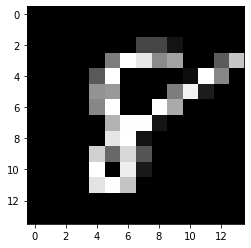

In [4]:
mnist_train = sio.loadmat('./ReducedMNIST/mnist_train.mat')
mnist_test = sio.loadmat('./ReducedMNIST/mnist_test.mat')
im_train, label_train = mnist_train['im_train'], mnist_train['label_train']
im_test, label_test = mnist_test['im_test'], mnist_test['label_test']
batch_size = 32
im_train, im_test = im_train / 255.0, im_test / 255.0

plt.imshow(im_train[:,123].reshape((14,14), order='F'), cmap='gray')

In [141]:
print("im_train   : {}".format(im_train.shape))
print("label_train: {}".format(label_train.shape))
print('===================================')


# create array with a number
def label_train_y (label_train):
    arr = np.zeros(10)
    arr[label_train] = 1
    return arr

def create_batch_array(data_size, batch_size):
    if (data_size / batch_size).is_integer():
        return np.random.permutation(data_size)
    else:
        a = np.arange(data_size)
        num = ((int(data_size / batch_size) + 1) * batch_size) - data_size
        additional_array = np.random.choice(data_size, num)
        return np.append(np.random.permutation(data_size), additional_array)
        


print(388*31)
def get_mini_batch(im_train, label_train, batch_size):
    im_size, data_size = im_train.shape
    permuted_pos  = create_batch_array(data_size, batch_size)
    
    mini_batch_x = []
    mini_batch_y = []
    
    in_batch_x = []
    in_batch_y = []
    for i, permute in enumerate (permuted_pos):
        if i % batch_size == 0:
            in_batch_x = []
            in_batch_y = []
            if i != 0:
                mini_batch_x.append(in_batch_x)
                mini_batch_y.append(in_batch_y)
        in_batch_x.append(im_train[:,permute])
#         print(label_train[:,permute])
        in_batch_y.append(label_train_y(label_train[:,permute]))
    mini_batch_x.append(in_batch_x)
    mini_batch_y.append(in_batch_y)
    
    
    mini_batch_x = np.asarray(mini_batch_x)
    mini_batch_y = np.asarray(mini_batch_y)
    
    return mini_batch_x, mini_batch_y
    
mini_batch_x, mini_batch_y = get_mini_batch(im_train, label_train, 31)

print("{}    {}".format(mini_batch_x.shape, mini_batch_y.shape))
    

im_train   : (196, 12000)
label_train: (1, 12000)
12028
(388, 31, 196)    (388, 31, 10)


In [124]:
def fc(x, w, b):
    # x = m X 1
    # w = n X m
    # b = n X 1
    # wx+b = n X m * m X 1 + n X 1 = n X 1
    Wx = np.matmul(w, x)
    y  = Wx + b
    return y

def fc_backward(dl_dy, x, w, b, y):
    # dl_dx = dl_dy * dy_dx
    # dl_dw = dl_dy * dy_dw
    # dl_db = dl_dy * dy_db
    dl_dx = dl_dy @ w                 # 1 x m
    dl_dw = dl_dy * x                 # 1 x (n X m)
    dl_db = dl_dy * 1                 # 1 x n
    return dl_dx, dl_dw, dl_db
    
def loss_euclidean(y_tilde, y):
    # y_tilde --> 
    l     = np.sum((y - y_tilde) ** 2)
    dl_dy = -2 * (y - y_tilde)

    return l, dl_dy

In [171]:
mnist_train = sio.loadmat('./ReducedMNIST/mnist_train.mat')
mnist_test = sio.loadmat('./ReducedMNIST/mnist_test.mat')
im_train, label_train = mnist_train['im_train'], mnist_train['label_train']
im_test, label_test = mnist_test['im_test'], mnist_test['label_test']
batch_size = 31
im_train, im_test = im_train / 255.0, im_test / 255.0

mini_batch_x, mini_batch_y = get_mini_batch(im_train, label_train, batch_size)

print("{}    {}".format(mini_batch_x.shape, mini_batch_y.shape))

x = mini_batch_x[0,0,:].reshape(-1,1)
y = mini_batch_y[0,0,:]
w = np.random.random_sample((10, 196))
b = np.random.random_sample((10, 1))

y_tilde = fc(x,w,b)

print('=============================')

y_tilde = y_tilde.reshape(-1)

l, dl_dy = loss_euclidean(y_tilde, y)
print(l.shape, dl_dy.reshape(-1,1).shape)
dl_dy = np.transpose(dl_dy.reshape(-1,1))

print('=============================')

dl_dx, dl_dw, dl_db = fc_backward(dl_dy, x, w, b, y)

print("x     : {}".format(x.shape))
print("w     : {}".format(w.shape))
print("b     : {}".format(b.shape))
print("y     : {}".format(y.shape))
print("dl_dy : {}".format(dl_dy.shape))
print("dl_dx : {}".format(dl_dx.shape))
print("dl_dw : {}".format(dl_dw.shape))
print("dl_db : {}".format(dl_db.shape))

# print("m_b_x : {}".format(mini_batch_x[0,0,:].reshape(196,1).shape))

(388, 31, 196)    (388, 31, 10)
() (10, 1)
x     : (196, 1)
w     : (10, 196)
b     : (10, 1)
y     : (10,)
dl_dy : (1, 10)
dl_dx : (1, 196)
dl_dw : (196, 10)
dl_db : (1, 10)


In [212]:
def train_slp_linear(mini_batch_x, mini_batch_y):
    print('\n')
    print("===================================================")
    num_of_batches, batch_size, _ = mini_batch_y.shape
    learning_rate = 0.1
    decay_rate    = 0.5       # (0, 1]
    w = np.random.random_sample((10, 196))
    w = np.array(w, dtype=np.float32)
    b = np.random.random_sample((10, 1))
    b = np.array(b, dtype=np.float32)

    k = 0                    # batch position
    nIters = 10000
    for iIter in range (nIters):
        if iIter % 1000 == 0:
            learning_rate = decay_rate * learning_rate
        dL_dw = 0
        dL_db = 0

        # for each image xi in kth mini-batch ...
        for i in range (batch_size):
            x = mini_batch_x[k,i,:].reshape(-1,1)                  # x       shape = m X 1
            y_tilde  = fc(x, w, b).reshape(-1)                     # y_tilde shape = n
            y        = mini_batch_y[k,i,:]                         # y       shape = n
            l, dl_dy = loss_euclidean(y_tilde, y)
            dl_dy = np.transpose(dl_dy.reshape(-1,1))              # dl_dy   shape = 1 x n
            dl_dx, dl_dw, dl_db = fc_backward(dl_dy, x, w, b, y)   # dl_dx   shape = 1 x m
                                                                   # dl_dw   shape = m x n -- 1 x (n x m)
                                                                   # dl_db   shape = 1 x n
            dL_dw += dl_dw
            dL_db += dl_db
        k += 1
        if k == num_of_batches:
            k = 0
        w = w - (learning_rate / batch_size * dL_dw.transpose())
        b = b - (learning_rate / batch_size * dL_db.transpose())

        print("SLP_LINEAR == Loading : {:.2f}%".format(iIter/nIters * 100), end='\r')
    return w, b



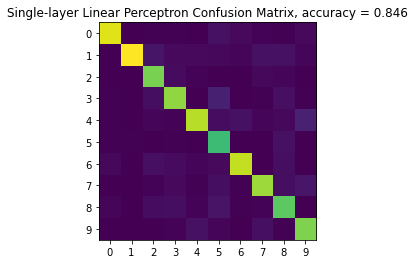

In [215]:
# mini_batch_x, mini_batch_y = get_mini_batch(im_train, label_train, batch_size)
# train_slp_linear(mini_batch_x, mini_batch_y)

main_slp_linear()

In [226]:
x = mini_batch_x[0,0,:].reshape(-1,1)
w = np.random.random_sample((10, 196))
b = np.random.random_sample((10, 1))

yy  = fc(x, w, b)

yy  = yy.reshape(-1)
y_tilde = np.exp(yy) / np.sum(np.exp(yy))
print(y_tilde.shape)


(10,)
